# Neurohackmap Project Neurohackademy 2019
## Wordcloud chapter
To visually represent the research topics and expertise of the attendees in the Neurohackademy 2019 event. 

The wordcloud here displays the research areas (words) mentioned by the attendees in different sizes increasing with the word frequency.

### Starting with installing the required libraries and data cleaning

In [90]:
#first, install the required packages (for reading data)
import numpy as np
import pandas as pd
from os import path


In [91]:
# sets the defaults for viewing the dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [92]:
#identifiers for missing values
missing_values = ["  ", "-"]

#load in data
df = pd.read_csv('../NeuroMap 2.csv', na_values = missing_values, encoding='latin-1')


In [94]:
## data cleaning
# rename column questions to shorter
df.columns = ['timestamp','consent','name','birthplace','birth_year', 'gender',
              'undergrad_deg','undergrad_loc',  'undergrad_inst','undergrad_research',
              'ra_qual','ra_lm_loc', 'ra_lm_inst', 'ra_lm_research',
              'masters_qual','masters_loc', 'masters_inst', 'masters_research', 
              'phd_qual','phd_loc', 'phd_inst', 'phd_research',
              'post_doc_qual', 'postdoc_loc' ,'postdoc_inst','postdoc_research', 
            'faculty_qual', 'faculty_loc', 'faculty_inst', 'faculty_research',
              'google_scholar']

# the geocoders we are going to use only work with one location at one time
# we need to replace entries that contain more than one location, and also names that contain special characters
replace_dict_birth = {
    "Tijuana, Baja California, MÌ©xico": "Tijuana, Baja California, Mexico",
    "Ìävreux, Normandy, France": "Normandy, France"
}
df['birthplace'] = df['birthplace'].replace(replace_dict_birth) 


replace_dict_undergrad = {
    "Tijuana, Baja California, MÌ©xico": "Tijuana, Baja California, Mexico",
    'Raleigh & Chapel Hill, North Carolina, USA': 'Chapel Hill, North Carolina, USA'
}
df['undergrad_loc'] = df['undergrad_loc'].replace(replace_dict_undergrad) 

replace_dict_research = {
    'Central Institute of Chemistry and Mechanics': 'Nagatinskaya, Moscow, Russia',
    'Boston, MA & San Francisco, CA': 'San Francisco, CA'    
}
df['ra_lm_loc'] = df['ra_lm_loc'].replace(replace_dict_research)

replace_dict_phd = {
    'Rio de Janeiro, Brazil AND Montreal, Canada': 'Rio de Janeiro, Brazil'
}
df['phd_loc'] = df['phd_loc'].replace(replace_dict_phd) 

replace_dict_postdoc = {
    'New Haven, CT, United States AND Durham, NC, United States': 'New Haven, CT, United States',
    '1) York, UK; 2) Sussex, UK': 'York, UK',
    'Seattle, WA and Cambridge, MA':'Seattle, WA'
}
df['postdoc_loc'] = df['postdoc_loc'].replace(replace_dict_postdoc)


## Similarity in research topics (using PhD research data as an example)

In [95]:
# assigning new variables for columns (phd_doc, phd_research) in dataframe df
phd_loc = df.phd_loc
phd_res = df.phd_research

#df.columns

In [17]:
# joining responses from all participants/entries as one long string
# here we are interested in the variable 'phd_res' (i.e. research topics) of the attendees
text=" ".join(str(dscp) for dscp in phd_res)
#print ("{} words in all combined review.".format(len(text)))

# update the list of STOPWORDS with your own ones (so they will not appear in the wordcloud)
stopwords = set(STOPWORDS)
stopwords.update(["in","along","and","making"])




#### to plot wordcloud within a mask (any image)
Words will be shown on any colours but white spaces (255, 255, 255) on the image
Yet, not all mask images have the same format resulting in different outcomes, hence making the WordCloud function not working properly.
The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type), and values of 1 are black.

In [18]:
#The function below transforms a mask if the mask is not in the right format (i.e. white spaces NOT shown as 255)
# e.g. in the example used here, the white spaces are shown as 0 (If you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.)

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# packages required for plotting wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

### Example 1: plot wordcloud in a head mask

In [19]:
# Loading in a mask image here
head_mask = np.array(Image.open("img/head.png"))
if len(head_mask.shape) ==3:
 head_mask = head_mask[:,:,-1]

In [20]:
# Transform the mask into a new one that will work with the function:
# Value of white space needs to be 255
tf_head_mask = np.ndarray((head_mask.shape[0],head_mask.shape[1]), np.int32)

for i in range(len(head_mask)):
    tf_head_mask[i] = list(map(transform_format, head_mask[i]))
    
#tf_head_mask

(-0.5, 685.5, 755.5, -0.5)

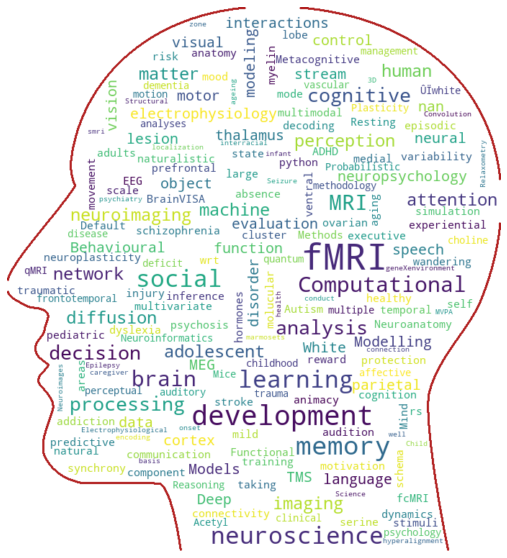

In [103]:

# Codes for generating a word cloud image:
wdcd = WordCloud(mask=tf_head_mask, stopwords=stopwords, max_font_size=50, max_words=1000, background_color="white", contour_width=3, contour_color='firebrick')
wdcd.generate(text)

# Display the generated image:
plt.figure(figsize=[20,10])
plt.imshow(wdcd, interpolation='bilinear')
plt.axis("off")



# Save the image in the img folder:
#wdcd.to_file("head_wordcloud.png")

### Example 2: plot wordcloud in a whole brain mask

In [104]:
brain_mask = np.array(Image.open("img/brain.png"))
if len(brain_mask.shape) ==3:
 brain_mask = brain_mask[:,:,-1]


In [105]:
# Transform your mask into a new one that will work with the function:
tf_brain_mask = np.ndarray((brain_mask.shape[0],brain_mask.shape[1]), np.int32)

for i in range(len(brain_mask)):
    tf_brain_mask[i] = list(map(transform_format, brain_mask[i]))
    
#tf_brain_mask

(-0.5, 688.5, 588.5, -0.5)

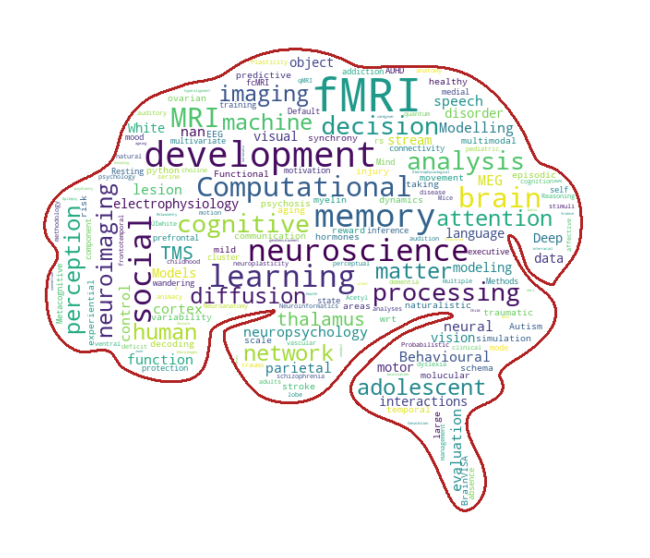

In [106]:

# Create and generate a word cloud image:
wdcd = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, max_words=1000, background_color="white", contour_width=3, contour_color='firebrick')
wdcd.generate(text)

# Display the generated image:
plt.figure(figsize=[20,10])
plt.imshow(wdcd, interpolation='bilinear')
plt.axis("off")


# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")

## Similarity in PhD topics by Continents

Disclaimers: there are much better ways to recode the data and split them by continents
The example here uses the geocoders function from geopy library to retrieve the latitude and longitude coordinates of a location and then class them into different continents

In [29]:
#loading required geopy functions
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="neuromap_cloud")

from geopy.exc import GeocoderTimedOut

#Many users encounter the issue of GeocoderTimedOut - this problem appears because you tried to request this address multiple times
#The codes below will keep retrying the do_geocode function until it manages to return without a Timeout exception being raised. 
def do_geocode(address):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

In [107]:
##These variables have already been created
#phd_loc = df.phd_loc
#phd_res = df.phd_research

#dropping the NaN cases in the PhD field
df_phd_sset = df.dropna(subset=["phd_loc"])


In [37]:

#Loop through rows to get the longitude and latitude of the hometowns
lat=[]
long=[]

for phdTownLoc in df_phd_sset.phd_loc:
    location_1 = do_geocode(phdTownLoc) #, timeout=10)
    #print((location_1.latitude, location_1.longitude, DocTownLocat))    
    
    lat.append(location_1.latitude)
    long.append(location_1.longitude)


In [97]:
location_dict = {
    "USA": "North America",
    "Italy": "Europe"
    
}

In [98]:
location_dict

{'USA': 'North America', 'Italy': 'Europe'}

In [ ]:
def find_location(string):
    for key, value in location_dict.items():
        if key in string:
            return value
    # If no keys are found in strings
    return None

In [96]:
phd_loc

0                        Pittsburgh, PA, USA
1                  Rovereto, Trentino, Italy
2             Melbourne, Victoria, Australia
3                             Birmingham, UK
4                      Philadelphia, PA, USA
5                             Washington, DC
6                         Frankfurt, Germany
7                               Paris/France
8                         San Diego, CA, USA
9                         Princeton, NJ, USA
10                Seattle, WA, United States
11                            Miami, FL, USA
12                                  York, UK
13                          Hamburg, Germany
14                            Pittsburgh, PA
15                        Seoul, South Korea
16                                       NaN
17                    London, United Kingdom
18                   Leiden, the Netherlands
19                           Boston, MA, USA
20            Santa Barbara, California, USA
21               Hanover, New Hampshire, USA
22        

In [38]:
       
#Saving lat and long in separate columns in the dataframe    
df_phd_sset['phdTownLatitude'] = lat
df_phd_sset['phdTownLatitude'] = df_phd_sset['phdTownLatitude'].astype('float')

df_phd_sset['phdTownLongitude'] = long
df_phd_sset['phdTownLongitude'] = df_phd_sset['phdTownLongitude'].astype('float')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [40]:
#df_phd_sset

In [41]:

df_phd_sset["phd_continent"] = ""
phdTLong = df_phd_sset.phdTownLongitude
phdTLat = df_phd_sset.phdTownLatitude


#north-america-long: -180 to -50
#north-america-lat: +10 to +90
mask = (phdTLong > -180)
mask &= (phdTLong < -50)
mask &= (phdTLat > 10)
mask &= (phdTLat < 90)
df_phd_sset.loc[mask, 'phd_continent'] = "NAmerica"

#south-america-long: -85 to -30
#south-america-lat: -60 to +10
mask = (phdTLong > -85)
mask &= (phdTLong < -30)
mask &= (phdTLat > -60)
mask &= (phdTLat < 10)
df_phd_sset.loc[mask, 'phd_continent'] = "SAmerica"

#europe-long: -15 to +60
#europe-lat: +35 to +70
mask = (phdTLong > -15)
mask &= (phdTLong < 60)
mask &= (phdTLat > 35)
mask &= (phdTLat < 70)
df_phd_sset.loc[mask, 'phd_continent'] = "Europe"


#asia-long: +30 to 180
#asia-lat: -50 to +90
mask = (phdTLong > 30)
mask &= (phdTLong < 180)
mask &= (phdTLat > -50)
mask &= (phdTLat < 90)
df_phd_sset.loc[mask, 'phd_continent'] = "AsiaPac"


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
#subsetting the df_phd_sset dataframe by different continents
df_phd_NAm = df_phd_sset[df_phd_sset.phd_continent=="NAmerica"] 
df_phd_Eur = df_phd_sset[df_phd_sset.phd_continent=="Europe"]
df_phd_AP = df_phd_sset[df_phd_sset.phd_continent=="AsiaPac"] 

In [43]:
## this needs updating
phd_res_NAm = df_phd_NAm.phd_research
phd_res_Eur = df_phd_Eur.phd_research
phd_res_AP = df_phd_AP.phd_research

#phd_res

textNAm =" ".join(str(dscp) for dscp in phd_res_NAm)
textEur =" ".join(str(dscp) for dscp in phd_res_Eur)
textAP =" ".join(str(dscp) for dscp in phd_res_AP)

stopwords=set(STOPWORDS)
stopwords.update(["in","along","and","making"])


In [44]:
#Values of 255 are pure white, whereas values of 1 are black. 
#Use the function below to transform mask if the mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [45]:
brain_mask = np.array(Image.open("img/brain.png"))
if len(brain_mask.shape) ==3:
 brain_mask = brain_mask[:,:,-1]


In [47]:

# Transform your mask into a new one that will work with the function:
tf_brain_mask = np.ndarray((brain_mask.shape[0],brain_mask.shape[1]), np.int32)


for i in range(len(brain_mask)):
    tf_brain_mask[i] = list(map(transform_format, brain_mask[i]))
    
#tf_brain_mask

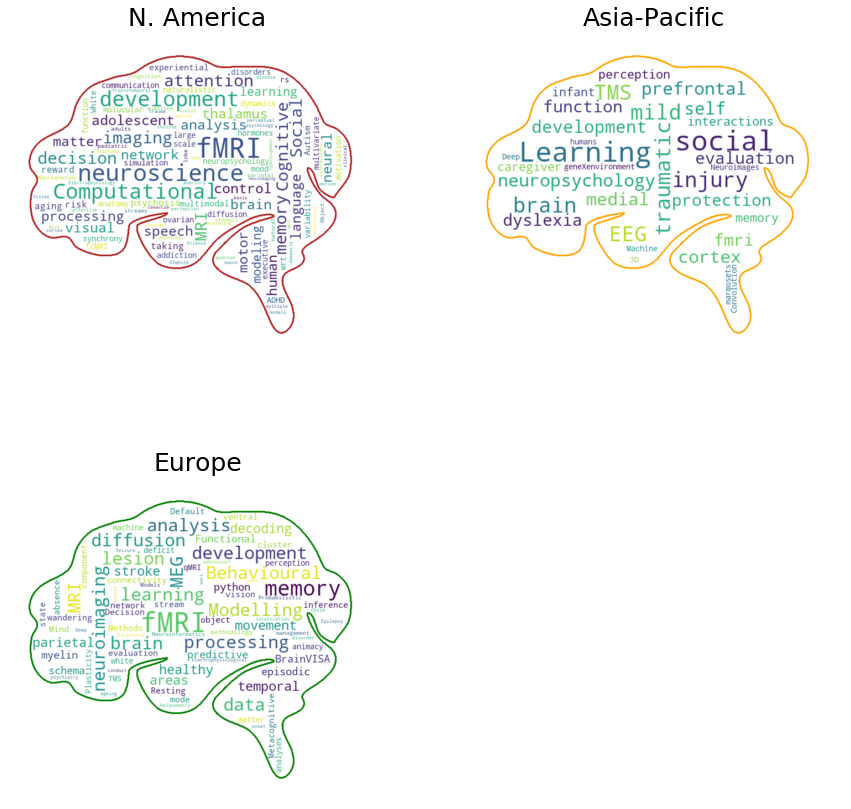

In [60]:

# Create and generate a word cloud image:
wc_NAm = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='firebrick')
wc_NAm.generate(textNAm)

wc_Eur = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='green')
wc_Eur.generate(textEur)

wc_AP = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='orange')
wc_AP.generate(textAP)


wordcloud = [wc_NAm, wc_Eur, wc_AP]
continent = ["N. America", "Europe", "Asia-Pacific"]


##NOT NEEDED AT THE MOMENT
fig, axs = plt.subplots(2,2, figsize=(15,15))
fig.delaxes(axs[1,1])

coord = [(0,0), (1,0), (0,1)]   #leaving (1,1) out

for ii, coordinate in enumerate(coord):
    continentname=continent[ii]
    ax = axs[coordinate]
    ax.imshow(wordcloud[ii], interpolation='bilinear')
    ax.set_title(continentname, fontsize=25)
    ax.set_axis_off()



#axs

'Asia-Pacific'

In [64]:
#to import neccessary module to run interactive features

%matplotlib inline
import matplotlib.pyplot as plt

from ipywidgets import interact

#from sklearn import datasets

In [88]:
#digits = datasets.load_digits()
wordcloud = [wc_NAm, wc_Eur, wc_AP]
continent = ["N. America", "Europe", "Asia-Pacific"]


def browse_images(wordcloud):
    n = len(wordcloud)
    def view_image(ii):
        plt.figure(figsize=[20,10])
        plt.imshow(wordcloud[ii], cmap=plt.cm.gray_r, interpolation='bilinear')
        plt.axis("off")
        plt.title('PhD research by Continent: %s' % continent[ii], fontsize=25)

    interact(view_image, ii=(0,n-1))
    



In [89]:

browse_images(wordcloud)


interactive(children=(IntSlider(value=1, description='ii', max=2), Output()), _dom_classes=('widget-interact',…